# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import package and authenticate (if needed)
import tidy3d as td
import tidy3d.web as web
# web.configure("YOUR API KEY GOES HERE")

In [2]:
# set up parameters of simulation (length scales are micrometers)
freq0 = td.C_0 / 0.75

In [3]:
# create structure
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), 
    medium=td.Medium(permittivity=2.0)
)

In [4]:
# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey",
)

In [5]:
# create monitor
monitor = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields",
    colocate=True,
)

In [6]:
# Initialize simulation
sim = td.Simulation(
    size=(4, 3, 3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0,
)

In [7]:
# visualize in 3D
sim.plot_3d(height=400, width=600)

In [8]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=False)

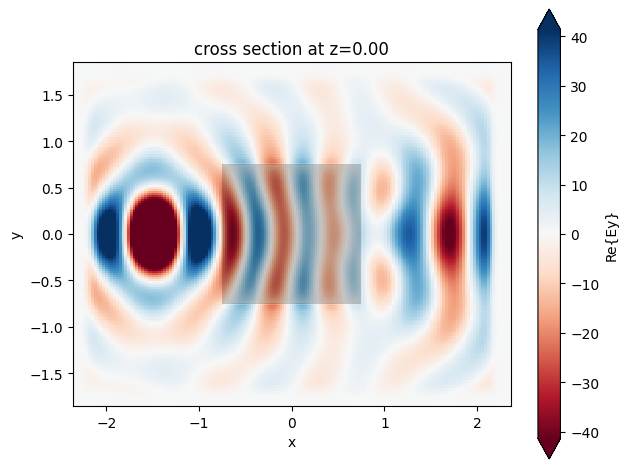

In [9]:
# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)